In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#sns.set(font_scale = 2,rc={'text.usetex': True})
sns.set_style("whitegrid")
sns.set(font_scale = 2)

In [15]:
def rename_dataset_name(name): 
    rename_map = {
        'breast_cancer': "Breast Cancer", 
        'german_credit': "German Credit"
    }
    
    new_name = rename_map.get(name)
    if not new_name: 
        return name.capitalize()
    else: 
        return new_name
    

In [16]:
df = pd.read_csv("results-other.csv")
df_lptml = pd.read_csv("reformatted_results.csv")
df["std_accuracy"] = pd.Series(data=[0 for _ in range(len(df))])
#df_lptml["dataset_name"] = df_lptml[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
df_lptml.rename(columns={
    "avg_precision": "precision",
    "avg_recall": "recall",
    "avg_f1": "f1",
    "avg_accuracy": "accuracy",
}, inplace=True)
# Drop for now std except accuracy, needed for plots
df_lptml = df_lptml[["algorithm","dataset_name","dataset_dimensions(elements|features|classes)","PCA","adversarial_noise","accuracy", "precision","recall","f1","std_accuracy"]]
df_lptml.head()

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1,std_accuracy
0,LPTML,image_segment,(2100|19|7),19,0.0,0.939,0.939,0.939,0.939,0.006
1,EUCLIDEAN,image_segment,(2100|19|7),19,0.0,0.930,0.930,0.931,0.930,0.009
2,LPTML,image_segment,(2100|19|7),19,0.1,0.900,0.902,0.902,0.901,0.021
3,EUCLIDEAN,image_segment,(2100|19|7),19,0.1,0.935,0.937,0.936,0.935,0.014
4,LPTML,image_segment,(2100|19|7),19,0.3,0.866,0.870,0.869,0.868,0.022


In [17]:
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("_Supervised", ""))
#df["dataset_name"] = df[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
#df.head()
df = df.append(df_lptml)
df = df[~df["algorithm"].isin(["MLKR", "LFDA", "LMNN"])]
df["dataset_name"] = df["dataset_name"].apply(lambda x: rename_dataset_name(x))
df.describe(include="all")
df.reset_index(inplace=True, drop=True)


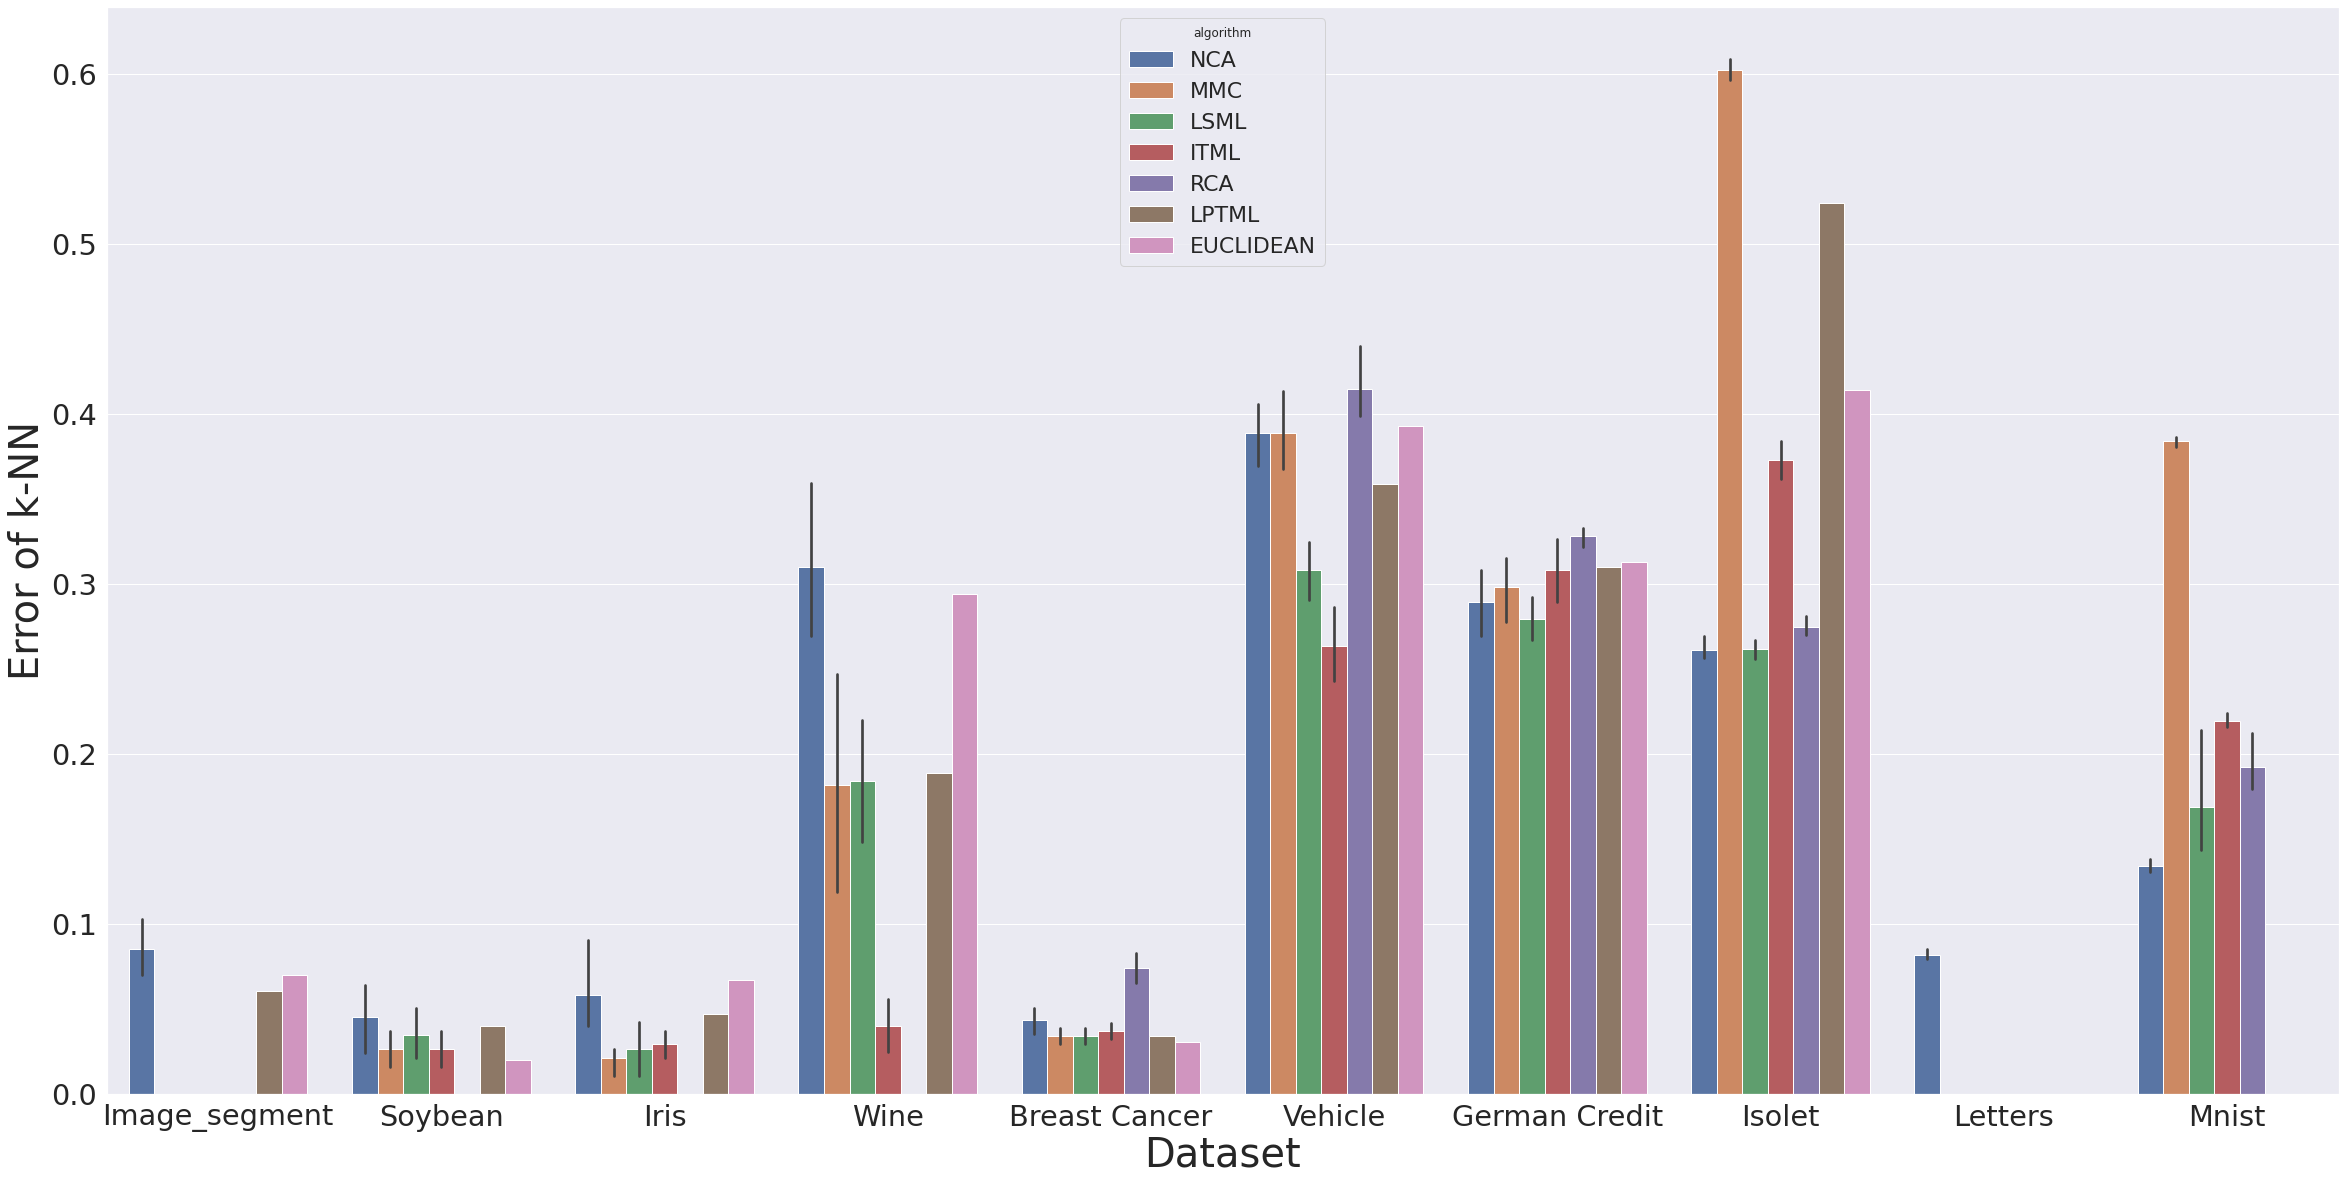

In [18]:
# Accuracy plot
plt.figure(figsize=(40, 20))
df["accuracy"] = 1 - df["accuracy"]
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy", "std_accuracy"]][df["adversarial_noise"] == 0]
accuracy_df.rename(columns={"accuracy": "error"}, inplace=True)
ax = sns.barplot(x="dataset_name", y="error", data=accuracy_df, hue="algorithm")
ax.set_xlabel("Dataset", fontsize=40)
ax.set_ylabel("Error of k-NN", fontsize=40)
ax.tick_params(labelsize="large")
plt.savefig("accuracy_plot.pdf")

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


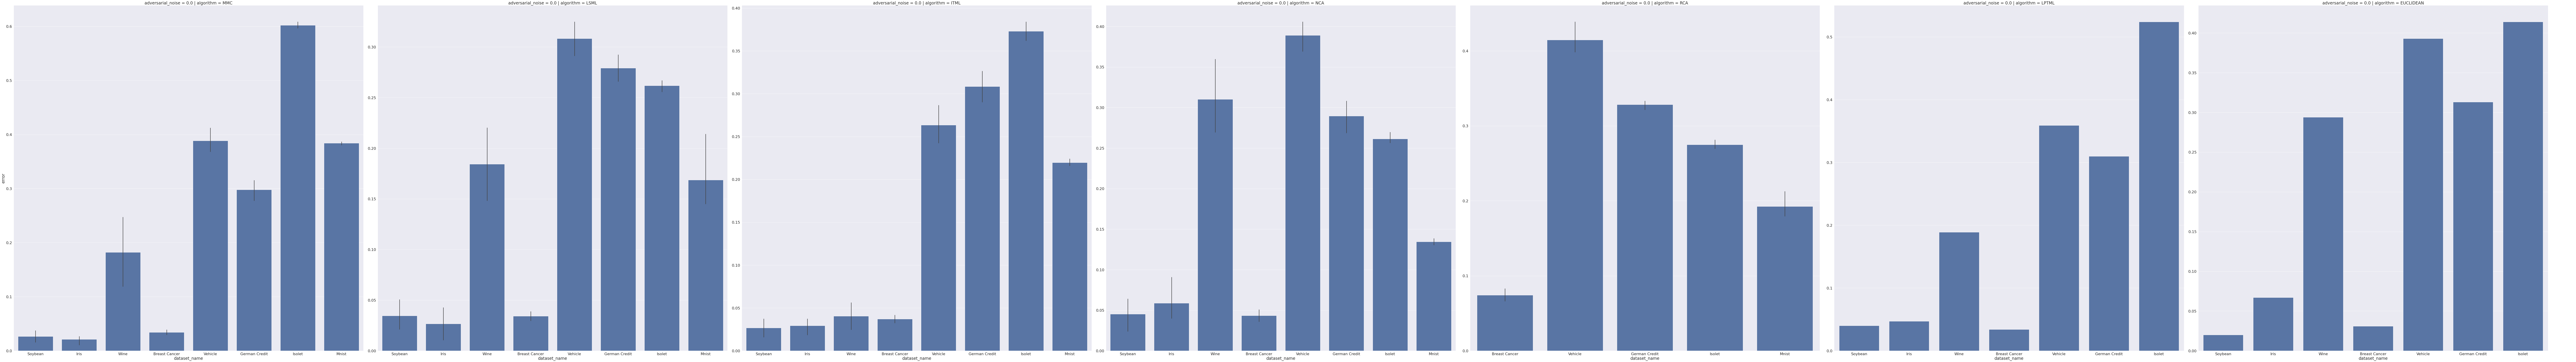

In [12]:
sns.set(font_scale = 2)
g = sns.FacetGrid(accuracy_df, col="algorithm", row="adversarial_noise", sharex=False, sharey=False, height=30)
g.map(sns.barplot, "dataset_name", "error").add_legend()
plt.savefig("final.png")

In [ ]:
len(df)